# Battle of Neighborhood

## Brooklyn, New York

### Capstone project to explore different neighborhood of Brooklyn, NY. Analysis of population density and  number of existing restaurants among these neighborhoods  to suggest a good location to open a new Asian restaurant.

### Download and Explore Dataset

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

! pip install BeautifulSoup4 # beautifulsoup library to extract data from HTML
import bs4 as bs
import urllib.request

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  23.98 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  37.85 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  54.23 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  36.13 MB/s
vincent-0.4.4- 100% |###################

In [2]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

### Creating dataframe with the neighborhood data of New York city

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

### Creating separate dataframes containing the neighborhoods of Brooklyn

In [7]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)

In [8]:
brooklyn_data

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471
5,Brooklyn,Brighton Beach,40.576825,-73.965094
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438
8,Brooklyn,Flatbush,40.636326,-73.958401
9,Brooklyn,Crown Heights,40.670829,-73.943291


In [9]:
brooklyn_data.shape

(70, 4)

### Let's get the geographical coordinates of Brooklyn

In [61]:
brooklyn_address = 'Brooklyn, NY'

geolocator = Nominatim()
location = geolocator.geocode(brooklyn_address)
brooklyn_latitude = location.latitude
brooklyn_longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(brooklyn_latitude, brooklyn_longitude))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


### Let's visualize neighborhoods in Brooklyn using folium

In [11]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[brooklyn_latitude, brooklyn_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

## Foursquare Location Data
### Utilizing Foursquare API to explore neighborhoods and segment them.
#### Define Foursquare Credentials and Version

In [12]:
CLIENT_ID = 'GETKZZNQH00HHAKHSHJV1RCJZWPXHAKO11NH4SEYPVCT4HTK' # your Foursquare ID
CLIENT_SECRET = 'PN0FMYA3WOKFQZ12KEE1OFJENU5XJZYIQBAD0SPOTXQMUFVQ' # your Foursquare Secret
VERSION = '20190311' # Foursquare API version
LIMIT=100

### Explore neighborhoods in Brooklyn

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        #print(url)   
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

In [15]:
print('There are {} venues in Brooklyn.'.format(brooklyn_venues.shape[0]))

There are 2800 venues in Brooklyn.


### Analyze each Neighborhood

In [16]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")
print(brooklyn_onehot.shape)
# add neighborhood column back to dataframe
brooklyn_onehot['Neighbourhood'] = brooklyn_venues['Neighborhood'] 
print(brooklyn_onehot.shape)
# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]
#brooklyn_onehot.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)
brooklyn_onehot.head()

(2800, 292)
(2800, 293)


,Neighbourhood,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy 

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category¶

In [17]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighbourhood').mean().reset_index()
brooklyn_grouped

,Neighbourhood,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy 

###  Print each neighborhood along with the top 5 most common venues

In [18]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                venue  freq
0          Donut Shop  0.06
1            Pharmacy  0.06
2          Kids Store  0.04
3  Italian Restaurant  0.04
4     Bubble Tea Shop  0.04


----Bay Ridge----
                 venue  freq
0                  Spa  0.09
1          Pizza Place  0.07
2   Italian Restaurant  0.07
3           Bagel Shop  0.04
4  American Restaurant  0.03


----Bedford Stuyvesant----
         venue  freq
0  Coffee Shop  0.11
1  Pizza Place  0.07
2         Café  0.07
3          Bar  0.07
4    Juice Bar  0.04


----Bensonhurst----
                venue  freq
0    Sushi Restaurant  0.06
1                Park  0.06
2  Chinese Restaurant  0.06
3      Ice Cream Shop  0.06
4              Bakery  0.03


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.33
1  Athletics & Sports  0.17
2      Baseball Field  0.17
3          Playground  0.17
4          Donut Shop  0.17


----Boerum Hill----
               venue  freq
0        Coffee Shop  0.06
1      

#### Function to sort the venues in descending order

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create new dataframe and display the top 10 venues for each neighborhood

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
brooklyn_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
brooklyn_neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighbourhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    brooklyn_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

brooklyn_neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Donut Shop,Pharmacy,Chinese Restaurant,Fast Food Restaurant,Kids Store,Sushi Restaurant,Restaurant,Italian Restaurant,Bubble Tea Shop,Clothing Store
1,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Thai Restaurant,American Restaurant,Bar,Grocery Store,Greek Restaurant,Chinese Restaurant
2,Bedford Stuyvesant,Coffee Shop,Bar,Pizza Place,Café,Fruit & Vegetable Store,Japanese Restaurant,Gourmet Shop,Cocktail Bar,Boutique,Juice Bar
3,Bensonhurst,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Park,Bakery,Liquor Store,Spa,Bridal Shop,Coffee Shop,Noodle House
4,Bergen Beach,Harbor / Marina,Baseball Field,Athletics & Sports,Donut Shop,Playground,Food Stand,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant
5,Boerum Hill,Coffee Shop,Dance Studio,Spa,French Restaurant,Bar,Gym / Fitness Center,Kids Store,Furniture / Home Store,Sandwich Place,Martial Arts Dojo
6,Borough Park,Pizza Place,Pharmacy,Bank,Fast Food Restaurant,Deli / Bodega,Bakery,Café,Men's Store,Bistro,Bike Shop
7,Brighton Beach,Beach,Restaurant,Eastern European Restaurant,Sushi Restaurant,Gourmet Shop,Bank,Mobile Phone Shop,Fast Food Restaurant,Neighborhood,Pharmacy
8,Broadway Junction,Diner,Donut Shop,Bus Station,Deli / Bodega,Ice Cream Shop,Burger Joint,Fried Chicken Joint,Moving Target,Caribbean Restaurant,Sandwich Place
9,Brooklyn Heights,Yoga Studio,Park,Italian Restaurant,Deli / Bodega,Cosmetics Shop,Pizza Place,Gym,Coffee Shop,Scenic Lookout,Plaza


### Cluster Neighborhoods

In [21]:
# set number of clusters
brooklyn_kclusters =5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighbourhood', 1)

# run k-means clustering
brooklyn_kmeans = KMeans(n_clusters=brooklyn_kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
brooklyn_kmeans.labels_[0:10]

array([1, 3, 3, 3, 1, 3, 1, 1, 1, 3], dtype=int32)

In [22]:
brooklyn_merged = brooklyn_data

# add clustering labels
brooklyn_merged['Cluster Labels'] = brooklyn_kmeans.labels_

brooklyn_merged = brooklyn_merged.join(brooklyn_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,1,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Thai Restaurant,American Restaurant,Bar,Grocery Store,Greek Restaurant,Chinese Restaurant
1,Brooklyn,Bensonhurst,40.611009,-73.995180,3,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Park,Bakery,Liquor Store,Spa,Bridal Shop,Coffee Shop,Noodle House
2,Brooklyn,Sunset Park,40.645103,-74.010316,3,Mexican Restaurant,Pizza Place,Latin American Restaurant,Bank,Bakery,Mobile Phone Shop,Gym,Pharmacy,Women's Store,Ice Cream Shop
3,Brooklyn,Greenpoint,40.730201,-73.954241,3,Bar,Pizza Place,Boutique,Coffee Shop,Cocktail Bar,Café,Yoga Studio,Record Shop,French Restaurant,Mexican Restaurant
4,Brooklyn,Gravesend,40.595260,-73.973471,1,Pizza Place,Bakery,Italian Restaurant,Lounge,Deli / Bodega,Pharmacy,Donut Shop,Chinese Restaurant,Bus Station,Men's Store


#### Let's visualize the resulting clusters

In [62]:
# create map
map_clusters = folium.Map(location=[brooklyn_latitude, brooklyn_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(brooklyn_kclusters)
ys = [i+x+(i*x)**2 for i in range(brooklyn_kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

##### Cluster 1

In [27]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Brooklyn Heights,Yoga Studio,Park,Italian Restaurant,Deli / Bodega,Cosmetics Shop,Pizza Place,Gym,Coffee Shop,Scenic Lookout,Plaza
36,Gerritsen Beach,Ice Cream Shop,Bar,Cosmetics Shop,Skating Rink,Seafood Restaurant,Martial Arts Dojo,Neighborhood,Event Space,Baseball Field,Harbor / Marina
41,Boerum Hill,Coffee Shop,Dance Studio,Spa,French Restaurant,Bar,Gym / Fitness Center,Kids Store,Furniture / Home Store,Sandwich Place,Martial Arts Dojo
45,Bergen Beach,Harbor / Marina,Baseball Field,Athletics & Sports,Donut Shop,Playground,Food Stand,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant
60,Mill Basin,Pizza Place,Japanese Restaurant,Italian Restaurant,Burger Joint,Bank,Bagel Shop,Cosmetics Shop,Chinese Restaurant,Gym,Sushi Restaurant


#### Cluster 2

In [28]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Bagel Shop,Thai Restaurant,American Restaurant,Bar,Grocery Store,Greek Restaurant,Chinese Restaurant
4,Gravesend,Pizza Place,Bakery,Italian Restaurant,Lounge,Deli / Bodega,Pharmacy,Donut Shop,Chinese Restaurant,Bus Station,Men's Store
6,Sheepshead Bay,Dessert Shop,Turkish Restaurant,Sandwich Place,Chinese Restaurant,Diner,Miscellaneous Shop,Café,Russian Restaurant,Restaurant,Grocery Store
7,Manhattan Terrace,Pizza Place,Cosmetics Shop,Pharmacy,Donut Shop,Bagel Shop,Grocery Store,Bus Station,Steakhouse,Chinese Restaurant,Organic Grocery
8,Flatbush,Coffee Shop,Caribbean Restaurant,Mexican Restaurant,Plaza,Hardware Store,Sandwich Place,Lounge,Bank,Bakery,Bagel Shop
10,East Flatbush,Chinese Restaurant,Caribbean Restaurant,Wine Shop,Food,Pharmacy,Moving Target,Print Shop,Park,Bakery,Supermarket
14,Brownsville,Restaurant,Park,Plaza,Discount Store,Spanish Restaurant,Fried Chicken Joint,Moving Target,Farmers Market,Chinese Restaurant,Donut Shop
17,Bedford Stuyvesant,Coffee Shop,Bar,Pizza Place,Café,Fruit & Vegetable Store,Japanese Restaurant,Gourmet Shop,Cocktail Bar,Boutique,Juice Bar
19,Cobble Hill,Bar,Italian Restaurant,Coffee Shop,Pizza Place,Yoga Studio,Ice Cream Shop,Cocktail Bar,Deli / Bodega,American Restaurant,Playground
20,Carroll Gardens,Italian Restaurant,Coffee Shop,Pizza Place,Bakery,Cocktail Bar,Bar,Food & Drink Shop,Spa,Wine Shop,Gym / Fitness Center


#### Cluster 3

In [29]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,Prospect Park South,Fast Food Restaurant,Pharmacy,Caribbean Restaurant,Mobile Phone Shop,Grocery Store,Pizza Place,Latin American Restaurant,Donut Shop,Clothing Store,Electronics Store


#### Cluster 4

In [30]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Park,Bakery,Liquor Store,Spa,Bridal Shop,Coffee Shop,Noodle House
2,Sunset Park,Mexican Restaurant,Pizza Place,Latin American Restaurant,Bank,Bakery,Mobile Phone Shop,Gym,Pharmacy,Women's Store,Ice Cream Shop
3,Greenpoint,Bar,Pizza Place,Boutique,Coffee Shop,Cocktail Bar,Café,Yoga Studio,Record Shop,French Restaurant,Mexican Restaurant
5,Brighton Beach,Beach,Restaurant,Eastern European Restaurant,Sushi Restaurant,Gourmet Shop,Bank,Mobile Phone Shop,Fast Food Restaurant,Neighborhood,Pharmacy
9,Crown Heights,Pizza Place,Café,Museum,Pharmacy,Salon / Barbershop,Burger Joint,Coffee Shop,Bakery,Bagel Shop,Candy Store
11,Kensington,Grocery Store,Thai Restaurant,Pizza Place,Ice Cream Shop,Restaurant,Sandwich Place,Mobile Phone Shop,Supermarket,Lingerie Store,Liquor Store
13,Prospect Heights,Bar,Thai Restaurant,Cocktail Bar,Wine Shop,American Restaurant,Mexican Restaurant,Bakery,Gourmet Shop,Pizza Place,Coffee Shop
15,Williamsburg,Bar,Bagel Shop,Coffee Shop,Diner,Tapas Restaurant,Korean Restaurant,Taco Place,Latin American Restaurant,Steakhouse,Breakfast Spot
16,Bushwick,Bar,Deli / Bodega,Mexican Restaurant,Coffee Shop,Pizza Place,Thrift / Vintage Store,Bakery,Discount Store,Sandwich Place,Diner
21,Red Hook,Art Gallery,Seafood Restaurant,Park,Wine Shop,Bagel Shop,Café,Flower Shop,Farm,New American Restaurant,Ice Cream Shop


#### Cluster 5

In [31]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Windsor Terrace,Plaza,Park,Diner,Food Truck,American Restaurant,Bakery,Bookstore,Sushi Restaurant,Grocery Store,Beer Store
52,Ocean Parkway,Grocery Store,Deli / Bodega,Donut Shop,Food & Drink Shop,Bus Stop,Steakhouse,Sake Bar,General Entertainment,Gift Shop,Bus Station


### Analysis of Brooklyn Neighborhoods By Population

In [32]:
website_url = urllib.request.urlopen('https://www.worldatlas.com/articles/brooklyn-neighborhoods-by-population.html').read()
soup = bs.BeautifulSoup(website_url,'lxml')
#mytable = soup.find('div',{'class':'tables table2 sliderespon'})
population_table = soup.find('table')
population_table

<table data-role="table">
<thead><tr><th>Rank</th><th>﻿Neighborhood</th><th>Population</th></tr></thead>
<tbody><tr><td>1</td><td>Bedford-Stuyvesant</td><td>157,530</td></tr><tr><td>2</td><td>Bensonhurst</td><td>151,705</td></tr><tr><td>3</td><td>Bushwick</td><td>129,239</td></tr><tr><td>4</td><td>Sunset Park</td><td>126,000</td></tr><tr><td>5</td><td>Borough Park</td><td>106,357</td></tr><tr><td>6</td><td>Flatbush</td><td>105,804</td></tr><tr><td>7</td><td>Prospect Lefferts Gardens</td><td>99,287</td></tr><tr><td>8</td><td>East New York</td><td>91,958</td></tr><tr><td>9</td><td>Crown Heights</td><td>85,886</td></tr><tr><td>10</td><td>Canarsie</td><td>83,693</td></tr><tr><td>11</td><td>Bay Ridge</td><td>79,371</td></tr><tr><td>12</td><td>Park Slope</td><td>65,047</td></tr><tr><td>13</td><td>Brownsville</td><td>58,300</td></tr><tr><td>14</td><td>Midwood</td><td>52,835</td></tr><tr><td>15</td><td>Bergen Beach</td><td>45,231</td></tr><tr><td>16</td><td>Marine Park</td><td>45,231</td></tr>

In [33]:
table_data = []
table_rows = population_table.find_all('tr')
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    table_data.append(row)

In [34]:
population_data = pd.DataFrame(table_data, columns=['Rank','Neighborhood','Population'])

In [35]:
population_data = population_data.iloc[1:]

In [36]:
population_data

,Rank,Neighborhood,Population
1,1,Bedford-Stuyvesant,"157,530"
2,2,Bensonhurst,"151,705"
3,3,Bushwick,"129,239"
4,4,Sunset Park,"126,000"
5,5,Borough Park,"106,357"
6,6,Flatbush,"105,804"
7,7,Prospect Lefferts Gardens,"99,287"
8,8,East New York,"91,958"
9,9,Crown Heights,"85,886"
10,10,Canarsie,"83,693"


In [42]:
population_data.dtypes

Rank            object
Neighborhood    object
Population      object
dtype: object

In [44]:
population_data['Population'] = population_data['Population'].str.replace(',', '')
population_data['Population'] = population_data['Population'].astype(int)

In [46]:
population_data.dtypes

Rank            object
Neighborhood    object
Population       int64
dtype: object

In [49]:
population_data.set_index('Neighborhood',inplace=True,drop=True)

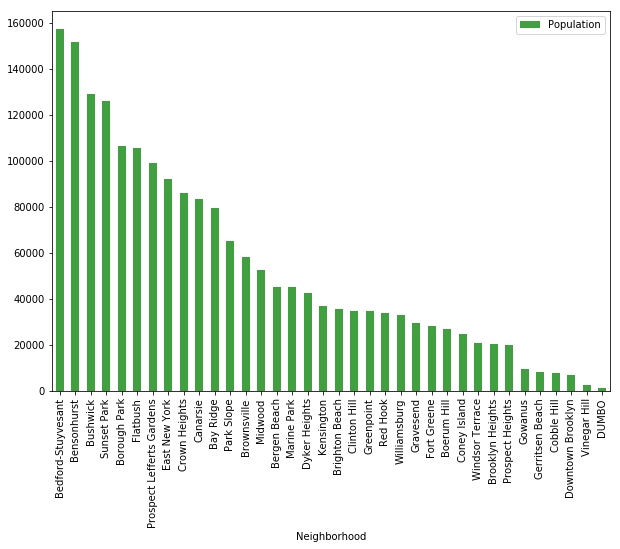

In [50]:
population_data.plot(kind='bar',figsize=(10,7),color='green',alpha=0.75);

#### Filter the data for restaurants 

In [51]:
def brooklyn_asianrestaurantcount(row):
    neighborhood=row['Neighborhood']
    brooklyn_restaurants_neighborhood=brooklyn_restaurants_df[brooklyn_restaurants_df['Neighborhood']==neighborhood]
    brooklyn_asianrestaurants_neighborhood=brooklyn_restaurants_neighborhood[brooklyn_restaurants_neighborhood['Venue Category']=='Asian Restaurant']
    return brooklyn_asianrestaurants_neighborhood.shape[0]

In [52]:
brooklyn_restaurants_df=brooklyn_venues[brooklyn_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
brooklyn_restaurants=brooklyn_restaurants_df.groupby(['Neighborhood']).size().reset_index(name='Restaurant count')
print('Total number of restaurant in Brooklyn is {}'.format(brooklyn_restaurants['Restaurant count'].sum()))

Total number of restaurant in Brooklyn is 664


In [53]:
brooklyn_restaurants['Asian Restaurant count']=brooklyn_restaurants.apply(brooklyn_asianrestaurantcount,axis=1)
print('Total number of Asian restaurant in Brooklyn is {}'.format(brooklyn_restaurants['Asian Restaurant count'].sum()))

Total number of Asian restaurant in Brooklyn is 15


### Count of restaurants and Asian restaurants in each of the neighborhoods of Brooklyn

In [54]:
brooklyn_restaurants.sort_values(by='Restaurant count',ascending=False)

,Neighborhood,Restaurant count,Asian Restaurant count
14,Clinton Hill,35,0
55,South Side,34,2
1,Bay Ridge,32,1
15,Cobble Hill,30,0
48,Prospect Heights,27,0
43,North Side,25,1
27,Fort Greene,25,0
8,Brooklyn Heights,23,2
12,Carroll Gardens,23,0
34,Greenpoint,22,0


## Conclusion:

### This analysis concludes that Clinton Hill is the best option among all the neighborhoods to open a new Asian restaurant followed by Bay Ridge and Cobble Hill. As these neighborhoods have the greatest number of restaurants in Brooklyn so opening a new restaurant with Asian cuisine will provide one more option to the customers. 

### Even though South Side ranks second in the list but as it already has two Asian restaurants so opening a new restaurant here will face more competition.

### Population distribution among these neighborhoods suggests that after Clinton Hill, Bay Ridge is a better option rather than Cobble Hill as it is more densely populated.
